In [1]:
import sys
sys.path.append("../../../")

import pandas as pd
from preprocessing import preprocessing_text_with_lemma
import numpy as np

[nltk_data] Downloading package stopwords to C:\Users\Rizha
[nltk_data]     Alfianita\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Rizha
[nltk_data]     Alfianita\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
fix_file = "../../../dataset/fix_data.csv"
fix_df = pd.read_csv(fix_file)

In [3]:
fix_df['preprocessed_text'] = fix_df['question_text'].apply(preprocessing_text_with_lemma)

In [4]:
X = fix_df['preprocessed_text'].apply(lambda x: ' '.join(x))
y = fix_df['target']

In [5]:
import sys
sys.path.append("..")

from KFold import KF

kf = KF(X, y, 0.4)
kf.split()

{0: 0.02, 1: 0.98}
{0: 0.976, 1: 0.024}
{0: 0.993, 1: 0.007}
{0: 0.841, 1: 0.159}
{0: 0.001, 1: 0.999}
{0: 0.716, 1: 0.284}
{0: 0.502, 1: 0.497}
{0: 0.252, 1: 0.748}
{0: 0.651, 1: 0.349}
{0: 0.279, 1: 0.721}
{0: 0.097, 1: 0.903}
{0: 0.097, 1: 0.903}
{0: 0.189, 1: 0.811}
{0: 0.912, 1: 0.088}
{0: 0.946, 1: 0.054}
{0: 0.017, 1: 0.983}
{0: 0.982, 1: 0.018}
{0: 0.988, 1: 0.012}
{0: 0.089, 1: 0.911}
{0: 0.008, 1: 0.992}
{0: 0.659, 1: 0.341}
{0: 0.001, 1: 0.999}
{0: 0.009, 1: 0.991}
{0: 0.011, 1: 0.989}
{0: 0.069, 1: 0.931}
{0: 0.004, 1: 0.996}
{0: 0.007, 1: 0.993}
{0: 0.4, 1: 0.6}
{0: 0.019, 1: 0.981}
{0: 0.003, 1: 0.997}
{0: 0.021, 1: 0.979}
{0: 0.002, 1: 0.998}
{0: 0.986, 1: 0.014}
{0: 0.793, 1: 0.207}
{0: 0.373, 1: 0.627}
{0: 0.227, 1: 0.773}
{0: 0.067, 1: 0.933}
{0: 0.157, 1: 0.843}
{0: 0.392, 1: 0.608}
{0: 0.188, 1: 0.812}
{0: 0.021, 1: 0.979}
{0: 0.016, 1: 0.984}
{0: 0.086, 1: 0.914}
{0: 0.28, 1: 0.72}
{0: 0.346, 1: 0.654}
{0: 0.013, 1: 0.987}
{0: 0.017, 1: 0.983}
{0: 0.012, 1: 0.988}


In [6]:
print("Cross-validation scores:", kf.scores)
print("Mean cross-validation score:", round(np.mean(kf.scores), 3))

Cross-validation scores: [0.811, 0.771, 0.804, 0.798, 0.799, 0.788, 0.777, 0.795, 0.808, 0.774]
Mean cross-validation score: 0.792


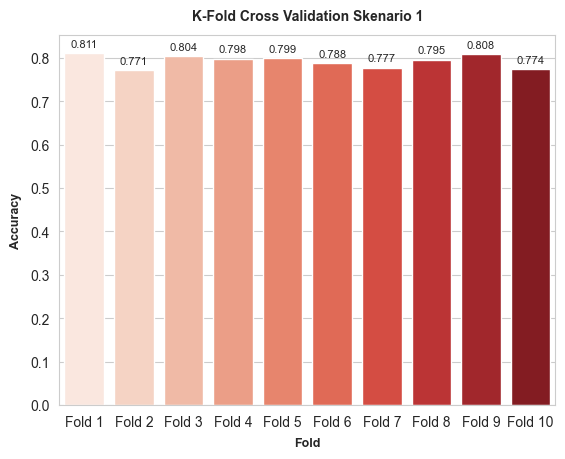

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

scenarios = ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5', 'Fold 6', 'Fold 7', 'Fold 8', 'Fold 9', 'Fold 10']
accuracy_values = kf.scores

# Define custom color palette with shades of red and reverse it
custom_palette = sns.color_palette("Reds_r", len(scenarios))[::-1]

sns.set_style('whitegrid')
ax = sns.barplot(x=scenarios, y=accuracy_values, palette=custom_palette)
plt.title('K-Fold Cross Validation Skenario 1', fontsize=10, fontweight='bold', pad=11)
plt.xlabel('Fold', fontsize=9, fontweight='semibold', labelpad=6)  # Add x-axis title
plt.ylabel('Accuracy', fontsize=9, fontweight='semibold', labelpad=6)   # Add y-axis title

# Add numeric values above the bars
for i, v in enumerate(accuracy_values):
    ax.text(i, v + 0.01, str(round(v, 3)), ha='center', va='bottom', fontsize=8)

plt.show()